# Programación Orientada a la Electrónica y a las Telecomunicaciones
## Examen Final
### 20 de julio de 2023

Lea con detenimiento las preguntas y muestre/grafique únicamente lo que se le pide. Así mismo, considere todos los lineamientos de programación, es decir, orden, nombres de variables significativos, correcto uso de funciones, correcto uso de comentarios/docstrings, etc.

El nombre del Jupyter notebook que Ud. envíe a través del aula virtual deberá tener el formato `Apellido_Nombre.ipynb`.

## Ejercicio 1 (10 puntos)

Se tiene un archivo “datos.csv” con información relacionada con el consumo energético en una casa residencial. El archivo tiene mediciones de consumo de potencia activa (`Global_active_power`) y reactiva (`Global_reactive_power`). El dataset tiene una resolución de 1 minuto. Inicialmente se deberá resamplear el dataset a una resolución diaria calculando los valores máximos.

Se requiere un programa que:

1. Muestre un gráfico de líneas con los valores de Potencia Global Activa y que resalte aquellas mediciones que son superiores a 8.5 (días en los que hubo actividad anómala).
2. Mostrar un gráfico que muestre la relación entre la Potencia Global Activa y Reactiva. Para ello, hacer uso de un scatter plot.


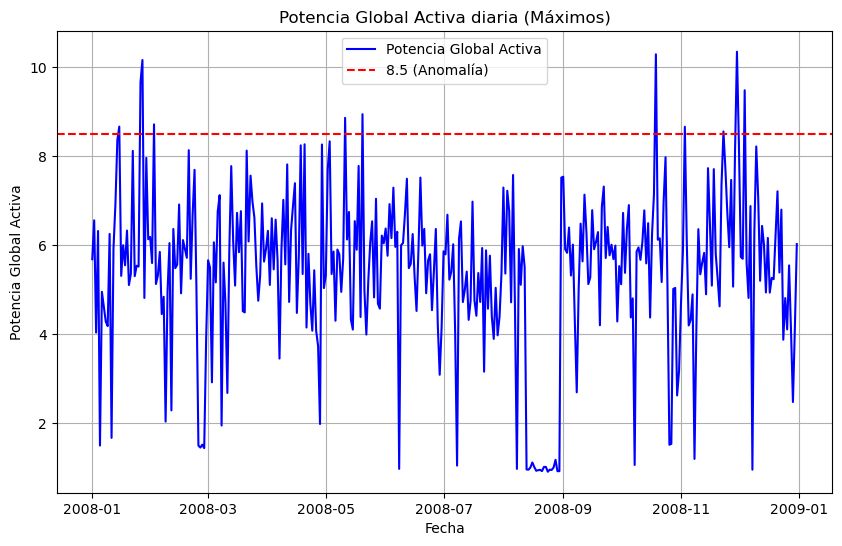

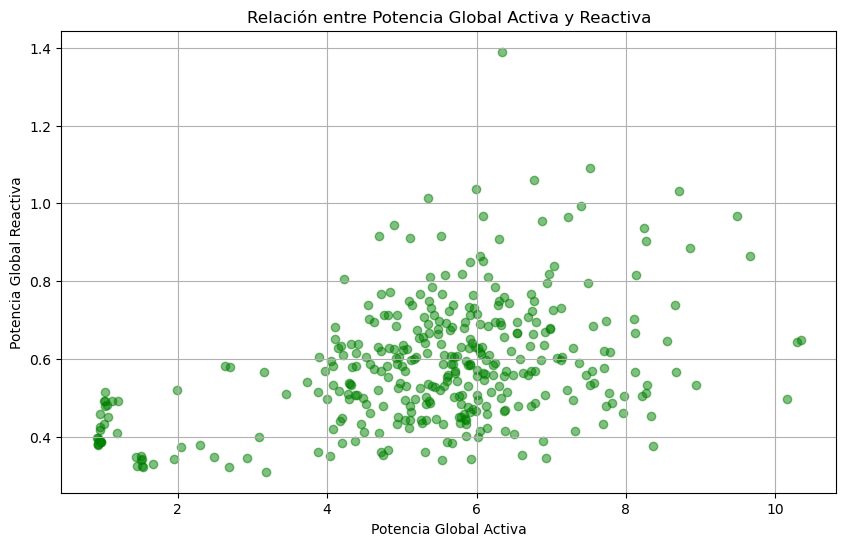

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('datos.csv', parse_dates=['datetime'], index_col='datetime')

# Resamplear a una resolucion diaria calculando los valores maximos
df_maximo_diario = df.resample('D').max()

# Grafico de lineas para Potencia Global Activa
plt.figure(figsize=(10, 6))
plt.plot(df_maximo_diario['Global_active_power'], label='Potencia Global Activa', color='blue')
plt.axhline(y=8.5, color='red', linestyle='--', label='8.5 (Anomalía)')
plt.xlabel('Fecha')
plt.ylabel('Potencia Global Activa')
plt.title('Potencia Global Activa diaria (Máximos)')
plt.legend()
plt.grid(True)
plt.show()

# Grafico de dispersion para Potencia Global Activa vs Potencia Global Reactiva
plt.figure(figsize=(10, 6))
plt.scatter(df_maximo_diario['Global_active_power'], df_maximo_diario['Global_reactive_power'], color='green', alpha=0.5)
plt.xlabel('Potencia Global Activa')
plt.ylabel('Potencia Global Reactiva')
plt.title('Relación entre Potencia Global Activa y Reactiva')
plt.grid(True)
plt.show()

## Ejercicio 2 (6 puntos)

Crear una función que tome una lista como parámetro. Esta lista puede contener números enteros positivos y puede estar en desorden. La función contará la cantidad de números perdidos y retornará ese valor. Para determinar números perdidos, analizar el siguiente ejemplo: <br><br>
assert contar_perdidos([1, 3, 5, 9]) == 5 <br><br>
Números perdidos:
- 1: 2 (entre 1 y 3)
- 1: 4 (entre 3 y 5)
- 3: 6, 7 y 8 (entre 5 y 9)



In [7]:
def contar_perdidos(lista):
    """
    Esta funcion toma una lista de numeros enteros positivos desordenados como parametro y cuenta la cantidad de 
    numeros perdidos en la secuencia.
    
    Parametros:
    -----------
    lista : list Una lista que contiene numeros enteros positivos. Puede estar en desorden.
        
    Retorna:
    --------
    int
        La cantidad de numeros perdidos en la secuencia dada por la lista. Un numero se considera perdido si no 
        esta presente en la secuencia y hay al menos un numero mayor y uno menor en la lista.
    """
    lista.sort()
    cantidad_perdidos = 0
    
    for i in range(len(lista) - 1):
        diferencia = lista[i + 1] - lista[i] - 1
        if diferencia > 0:
            cantidad_perdidos += diferencia
    
    return cantidad_perdidos

# Presentando los resultados
lista = [1, 3, 5, 9]
resultado = contar_perdidos(lista)
print(f'Hay {resultado} numeros perdidos en la lista {lista}')


# Realizando pruebas
assert contar_perdidos(lista) == 5
assert contar_perdidos([1, 3, 4, 5, 9]) == 4
assert contar_perdidos([1, 3, 4, 5, 7, 9]) == 3


Hay 5 numeros perdidos en la lista [1, 3, 5, 9]


## Ejercicio 3 (14 puntos)

Se tiene un dataset en formato CSV que contiene los nombres de los estudiantes y las calificaciones desagregadas obtenidas por esos estudiantes para una materia específica. Las calificaciones corresponden a los siguientes COMPONENTES: Aprovechamiento 1 (sobre 25), Examen Interciclo (sobre 20), Aprovechamiento 2 (sobre 25), Examen Final (sobre 30), Examen Supletorio (sobre 30), y Total (la suma sobre 100 de las calificaciones parciales). Es decir, para cada estudiante vamos a tener 5 o 6 calificaciones (una por cada componente, se tendrán 6 calificaciones en caso de que el estudiante haya rendido el supletorio), por ejemplo:

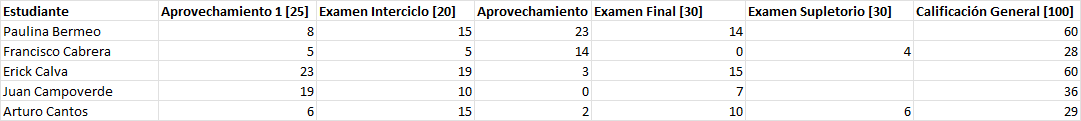

Lee los datos de este dataset en un dataframe de Pandas. Luego, escriba una función separada en Python para cada una de las siguientes tareas:

1. Agregar las calificaciones de un nuevo estudiante al dataframe. La función deberá recibir como parámetros el nombre y las calificaciones del estudiante en los 5 componentes. El sexto componente (Calificación Total) se deberá calcular automáticamente como la suma de los otros componentes. En caso de que la calificación del supletorio esté disponible, recuerde que la nota del supletorio reemplaza al examen final en el cálculo de la calificación total **(2 puntos)**
2. Modificar una calificación individual de un estudiante específico. La función deberá recibir como parámetros el nombre del estudiante, el componente que quiere modificar, y la nueva calificación. **(2 puntos)**
3. Eliminar un estudiante. La función deberá recibir como parámetro el nombre del estudiante que se desea eliminar. **(2 puntos)**
4. Mostrar las calificaciones de todos los componentes de un estudiante específico. La función deberá recibir como parámetro el nombre del estudiante. **(2 puntos)**
5. Mostrar el nombre y la nota de los estudiantes con la calificación mayor y menor en un componente específico. La función deberá recibir como parámetro el nombre del componente para el cual se desea determinar el máximo y el mínimo. **(2 puntos)**
6. Mostrar el promedio de las calificaciones de todos los estudiantes en un componente específico. La función deberá recibir como parámetro el nombre del componente para el cual se desea visualizar el promedio. **(2 puntos)**
7. Listar todos los estudiantes ordenados por una columna específica. Esta función recibirá como parámetros el nombre de la columna por la cual se desea ordenar los datos (por ejemplo, estudiante, aprovechamiento 1, interciclo, etc.), y si el orden debe ser ascendente o descendente. **(1 punto)**

El script deberá mostrar un menú que permita al usuario escoger la tarea que desea realizar de la siguiente manera **(1 punto)**:

1. Agregar estudiante
2. Modificar calificación
3. Eliminar estudiante
4. Mostrar todas las calificaciones de un estudiante
5. Mostrar estudiantes con calificaciones mayores y menores
6. Mostrar calificación promedio
7. Listar todos los estudiantes
8. Salir

Escoja una opción [1-6]:

Para cada tarea se deberá solicitar al usuario la información requerida y mostrar los resultados correspondientes. Luego de mostrar los resultados, el script deberá mostrar nuevamente el menú hasta que el usuario escoja la opción Salir (opción 8).

In [39]:
df = pd.read_csv('calificaciones.csv', encoding='latin1')

# Literal 1: ---------------------------------------------------------------
def agregar_nuevo_estudiante(nombre, ap1, interciclo, ap2, examen_final, examen_supletorio=None):
    """
    Agrega las calificaciones de un nuevo estudiante al DataFrame.

    Parametros:
    -----------
    nombre : str El nombre del estudiante.
    ap1 : float calificacion de Aprovechamiento 1 (sobre 25).
    interciclo : float Calificacion de Examen Interciclo (sobre 20).
    ap2 : float Calificacion de Aprovechamiento 2 (sobre 25).
    examen_final : float Calificacion de Examen Final (sobre 30).
    examen_supletorio : float, opcional Calificacion de Examen Supletorio (sobre 30). Si no se proporciona, se asumira como None.

    Retorna:
    --------
    DataFrame
        El DataFrame actualizado con los datos del nuevo estudiante.
    """
    # Calcular la calificación total
    calificacion_total = ap1 + interciclo + ap2 + examen_final
    if examen_supletorio is not None:
        calificacion_total = max(calificacion_total, examen_supletorio)

    # Crear una nueva fila con los datos del nuevo estudiante
    nuevo_estudiante = {
        'Estudiante': nombre,
        'Aprovechamiento 1 [25]': ap1,
        'Interciclo [20]': interciclo,
        'Aprovechamiento 2 [25]': ap2,
        'Examen Final [30]': examen_final,
        'Examen Supletorio [30]': examen_supletorio,
        'Total [100]': calificacion_total
    }

    # Agregar la nueva fila al DataFrame
    df_nuevo_estudiante = df.append(nuevo_estudiante, ignore_index=True)

    return df_nuevo_estudiante


# Literal 2: ---------------------------------------------------------------
def modificar_calificacion(nombre_estudiante, componente, nueva_calificacion):
    """
    Modifica una calificación individual de un estudiante específico en el DataFrame.

    Parametros:
    -----------
    nombre_estudiante : str El nombre del estudiante cuya calificacion se quiere modificar.
    componente : str El componente para el cual se quiere modificar la calificacion
    nueva_calificacion : float a nueva calificacion que se quiere asignar al componente.

    Retorna:
    --------
    DataFrame
        El DataFrame actualizado con la nueva calificacion del estudiante y componente.
    """
    # Buscar el índice del estudiante en el DataFrame
    indice_estudiante = df.index[df['Estudiante'] == nombre_estudiante]

    if not indice_estudiante.empty:
        indice = indice_estudiante[0]
        df.at[indice, componente] = nueva_calificacion
        # Recalcular la calificación total si hay examen supletorio
        if 'Examen Supletorio [30]' in df.columns:
            ap1 = df.at[indice, 'Aprovechamiento 1 [25]']
            interciclo = df.at[indice, 'Interciclo [20]']
            ap2 = df.at[indice, 'Aprovechamiento 2 [25]']
            examen_final = df.at[indice, 'Examen Final [30]']
            examen_supletorio = df.at[indice, 'Examen Supletorio [30]']
            calificacion_total = max(ap1 + interciclo + ap2 + examen_final, examen_supletorio)
            df.at[indice, 'Total [100]'] = calificacion_total
    else:
        print(f"Estudiante '{nombre_estudiante}' no encontrado en el DataFrame.")

    return df


# Literal 3: ---------------------------------------------------------------
def eliminar_estudiante(nombre_estudiante):
    """
    Elimina un estudiante especifico del DataFrame.

    Parametros:
    -----------
    nombre_estudiante : str El nombre del estudiante que se desea eliminar.

    Retorna:
    --------
    DataFrame
        El DataFrame actualizado sin el estudiante eliminado.
    """
    # Filtrar el DataFrame para mantener solo los estudiantes diferentes al que queremos eliminar
    df_sin_estudiante = df[df['Estudiante'] != nombre_estudiante]

    if len(df_sin_estudiante) == len(df):
        print(f"Estudiante '{nombre_estudiante}' no encontrado en el DataFrame.")
    else:
        print(f"Estudiante '{nombre_estudiante}' eliminado del DataFrame.")

    return df_sin_estudiante


# Literal 4: ---------------------------------------------------------------
def mostrar_calificaciones_estudiante(nombre_estudiante):
    """
    Muestra las calificaciones de todos los componentes de un estudiante especifico.

    Parametros:
    -----------
    nombre_estudiante : str El nombre del estudiante del cual se quieren mostrar las calificaciones.

    Retorna:
    --------
    Nada
    """
    estudiante_filtrado = df[df['Estudiante'] == nombre_estudiante]

    if len(estudiante_filtrado) == 0:
        print(f"Estudiante '{nombre_estudiante}' no encontrado en el DataFrame.")
    else:
        calificaciones = estudiante_filtrado.iloc[0]
        print(f"Calificaciones del estudiante '{nombre_estudiante}':")
        for componente, calificacion in calificaciones.items():
            print(f"{componente}: {calificacion}")


# Literal 5: ---------------------------------------------------------------
def estudiantes_calificacion_extrema(componente):
    """
    Muestra el nombre y la nota de los estudiantes con la calificacion mayor y menor en un componente especifico.

    Parametros:
    -----------
    componente : str El nombre del componente para el cual se desea determinar el maximo y el minimo.

    Retorna:
    --------
    Nada
    """
    if componente not in df.columns:
        print(f"Componente '{componente}' no encontrado en el DataFrame.")
    else:
        max_calificacion = df[componente].max()
        min_calificacion = df[componente].min()

        estudiante_max = df.loc[df[componente] == max_calificacion, 'Estudiante'].values[0]
        estudiante_min = df.loc[df[componente] == min_calificacion, 'Estudiante'].values[0]

        print(f"Calificación máxima en '{componente}':")
        print(f"Estudiante: {estudiante_max}")
        print(f"Calificación: {max_calificacion}\n")

        print(f"Calificación mínima en '{componente}':")
        print(f"Estudiante: {estudiante_min}")
        print(f"Calificación: {min_calificacion}")
        

# Literal 6: ---------------------------------------------------------------
def promedio_calificaciones_componente(componente):
    """
    Muestra el promedio de las calificaciones de todos los estudiantes en un componente especifico

    Parametros:
    -----------
    componente : str El nombre del componente para el cual se desea visualizar el promedio.

    Retorna:
    --------
    Nada
    """
    if componente not in df.columns:
        print(f"Componente '{componente}' no encontrado en el DataFrame.")
    else:
        promedio = df[componente].mean()
        print(f"Promedio en '{componente}': {promedio:.2f}")


# Literal 7: ---------------------------------------------------------------
def listar_estudiantes_ordenados(columna, ascendente=True):
    """
    Lista todos los estudiantes ordenados por una columna especifica.

    Parametros:
    -----------
    columna : str El nombre de la columna por la cual se desea ordenar los datos.
    ascendente : bool, opcional indica si el orden debe ser ascendente (True) o descendente (False). Por defecto, es True.

    Retorna:
    --------
    DataFrame
        El DataFrame con los estudiantes ordenados segun la columna especificada.
    """
    
    
def mostrar_menu():
    """
    Muestra el menú interactivo y solicita al usuario que seleccione una opcion.

    Retorna:
    --------
    int
        La opcion seleccionada por el usuario.
    """
    while True:
        print("\nMenú:")
        print("1. Agregar estudiante")
        print("2. Modificar calificación")
        print("3. Eliminar estudiante")
        print("4. Mostrar todas las calificaciones de un estudiante")
        print("5. Mostrar estudiantes con calificaciones mayores y menores")
        print("6. Mostrar calificación promedio")
        print("7. Listar todos los estudiantes")
        print("8. Salir")
        opcion = input("\nEscoja una opción [1-8]: ")

        if opcion.isdigit():
            opcion = int(opcion)
            if opcion in range(1, 9):
                return opcion
            else:
                print("Opcion invalida. Por favor, seleccione una opcion del 1 al 8.")
        else:
            print("Opcion invalida. Por favor, ingrese un numero del 1 al 8.")
            
    
def main():
    
    opcion_usuario = mostrar_menu()
    
    if opcion_usuario == 1:
        
        nombre = input("\nIngrese el nombre del estudiante: ")
        ap1 = int(input("\nIngrese el Aprovechamiento 1: "))
        interciclo = int(input("\nIngrese la nota del examen interciclo: "))
        ap2 = int(input("\nIngrese el Aprovechamiento 2: "))
        examen_final = int(input("\nIngrese la nota del examen final: "))
        examen_supletorio = int(input("\nIngrese la nota del examen supletorio: "))
        
        nuevo_estudiante_df = agregar_nuevo_estudiante(nombre, ap1, interciclo, ap2, examen_final, examen_supletorio)
        print(nuevo_estudiante_df)
        
    if opcion_usuario == 2:
        
        nombre_estudiante = input("\nIngrese el nombre del estudiante: ")
        componente = input("\nIngrese el nombre del componente: ")
        nueva_calificacion = int(input("\nIngrese la nnueva calificacion: "))
        
        df_modificado = modificar_calificacion(nombre_estudiante, componente, nueva_calificacion)
        print(df_modificado)
        
    if opcion_usuario == 3:
        
        nombre_estudiante = input("\nIngrese el nombre del estudiante: ")
        df_actualizado = eliminar_estudiante(nombre_estudiante)
        print(df_actualizado)
        
    if opcion_usuario == 4:
        nombre_estudiante = input("\nIngrese el nombre del estudiante: ")
        mostrar_calificaciones_estudiante(nombre_estudiante)
        
    if opcion_usuario == 5:
        
        componente = input("\nIngrese el nombre del componente: ")
        estudiantes_calificacion_extrema(componente)
        
    if opcion_usuario == 6:
        
        componente = input("\nIngrese el nombre del componente: ")
        promedio_calificaciones_componente(componente)
        
    if opcion_usuario == 7:
        
        df_estudiantes_ordenados =  componente = input("\nIngrese el nombre del componente: ")
        listar_estudiantes_ordenados(componente, ascendente=True)
        print(df_estudiantes_ordenados)
        
    if opcion_usuario == 8:
        print(f"\nGracias por utilizar nuestros servicios!!!")
        
        
main()



Menú:
1. Agregar estudiante
2. Modificar calificación
3. Eliminar estudiante
4. Mostrar todas las calificaciones de un estudiante
5. Mostrar estudiantes con calificaciones mayores y menores
6. Mostrar calificación promedio
7. Listar todos los estudiantes
8. Salir
Calificación máxima en 'Aprovechamiento 1 [25]':
Estudiante: CAMPOVERDE TENEZACA JUAN PABLO
Calificación: 25.0

Calificación mínima en 'Aprovechamiento 1 [25]':
Estudiante: MEJIA CAMPOVERDE MARIA DEL PILAR
Calificación: 4.6
